In [1]:
#Kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
dataFrame = pd.read_excel("merc.xlsx")

In [3]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [4]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [5]:
#Null veri kontrolü
dataFrame.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

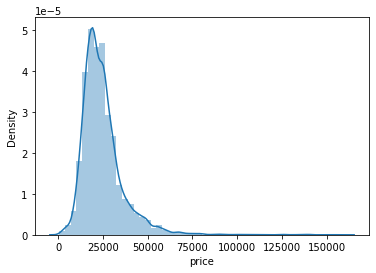

In [6]:
#Araba fiyatının dağılımını görmek için:
sbn.distplot(dataFrame["price"])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

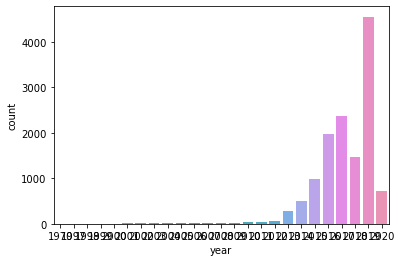

In [7]:
#Yıllara göre kaç tane araba olduğunu görmek için:
sbn.countplot(dataFrame["year"])

In [8]:
#Özellikler arasındaki korelasyonu görmek için:
dataFrame.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [9]:
dataFrame.corr()["price"].sort_values()

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='mileage', ylabel='price'>

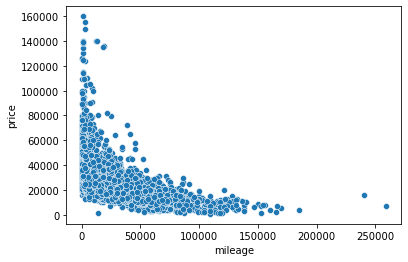

In [10]:
#mileage yani kilometrenin fiyata olan etkisini grafik üzerinde görmek için:
sbn.scatterplot(x = "mileage",y = "price", data = dataFrame)

In [11]:
#Grafikleri incelediğimizde çok yüksek fiyatlı arabalar az bulunmakta ve bunlar model başarısını düşürebilir. Bu yüksek fiyatlı arabaları görelim:
dataFrame.sort_values("price",ascending = False).head(20)


,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [12]:
#NOT: Bir verinin %99'unu alırsanız o verinin yansıttığı genel tabloyu bozmadan devam edebilirsiniz.
len(dataFrame) * 0.01

131.19

In [13]:
#En yüksek fiyatlı 131 veriyi almadan yeni verisetimize kalan verileri atalım:
newDataFrame = dataFrame.sort_values("price",ascending = False).iloc[131:]

In [14]:
newDataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

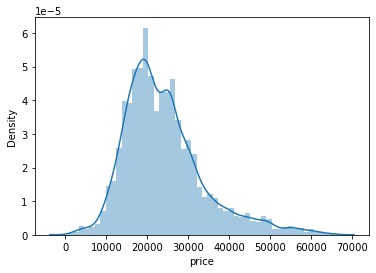

In [15]:
sbn.distplot(newDataFrame["price"])

In [16]:
  newDataFrame.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [17]:
dataFrame.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [18]:
#1970 yılında araba fiyatı çok yüksek anormal bir şekilde. Çıkarmak için:
dataFrame = newDataFrame[newDataFrame.year != 1970]

In [19]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [20]:
#Veri setimizde kategorik bir sütun vardır bunu kaldırmak istiyorum. O yüzden:
dataFrame = dataFrame.drop("transmission",axis=1)

In [21]:
dataFrame.head()

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0


In [22]:
y = dataFrame["price"].values
x = dataFrame.drop("price",axis=1).values

In [23]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64)

In [24]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [27]:
len(x_train)

9090

In [28]:
len(x_test)

3897

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

In [31]:
x_train = scaler.fit_transform(x_train)

In [32]:
x_test = scaler.transform(x_test)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [34]:
x_train.shape

(9090, 5)

In [35]:
model = Sequential()

model.add(Dense(12,activation = "relu"))
model.add(Dense(12,activation = "relu"))
model.add(Dense(12,activation = "relu"))
model.add(Dense(12,activation = "relu"))
#çıkış katmanı:
model.add(Dense(1)) 

model.compile(optimizer="adam",loss="mse")

In [36]:
model.fit(x = x_train, y = y_train,validation_data=(x_test,y_test), batch_size=250, epochs = 300)

Epoch 1/300
37/37 [==============================] - 0s 12ms/step - loss: 672144384.0000 - val_loss: 688101248.0000
Epoch 2/300
37/37 [==============================] - 0s 7ms/step - loss: 672117632.0000 - val_loss: 688051392.0000
Epoch 3/300
37/37 [==============================] - 0s 6ms/step - loss: 672016000.0000 - val_loss: 687861376.0000
Epoch 4/300
37/37 [==============================] - 0s 5ms/step - loss: 671676736.0000 - val_loss: 687290752.0000
Epoch 5/300
37/37 [==============================] - 0s 5ms/step - loss: 670760384.0000 - val_loss: 685856192.0000
Epoch 6/300
37/37 [==============================] - 0s 5ms/step - loss: 668607680.0000 - val_loss: 682666432.0000
Epoch 7/300
37/37 [==============================] - 0s 5ms/step - loss: 664118912.0000 - val_loss: 676339200.0000
Epoch 8/300
37/37 [==============================] - 0s 5ms/step - loss: 655644352.0000 - val_loss: 664856512.0000
Epoch 9/300
37/37 [==============================] - 0s 5ms/step - loss: 640796

37/37 [==============================] - 0s 3ms/step - loss: 27310346.0000 - val_loss: 28129932.0000
Epoch 144/300
37/37 [==============================] - 0s 3ms/step - loss: 26937440.0000 - val_loss: 27808958.0000
Epoch 145/300
37/37 [==============================] - 0s 3ms/step - loss: 26618992.0000 - val_loss: 27514278.0000
Epoch 146/300
37/37 [==============================] - 0s 3ms/step - loss: 26356786.0000 - val_loss: 27256782.0000
Epoch 147/300
37/37 [==============================] - 0s 6ms/step - loss: 26106304.0000 - val_loss: 26992818.0000
Epoch 148/300
37/37 [==============================] - 0s 6ms/step - loss: 25865412.0000 - val_loss: 26725720.0000
Epoch 149/300
37/37 [==============================] - 0s 6ms/step - loss: 25612582.0000 - val_loss: 26524918.0000
Epoch 150/300
37/37 [==============================] - 0s 6ms/step - loss: 25376970.0000 - val_loss: 26253878.0000
Epoch 151/300
37/37 [==============================] - 0s 5ms/step - loss: 25127970.0000 - val

37/37 [==============================] - 0s 5ms/step - loss: 19315492.0000 - val_loss: 20797596.0000
Epoch 286/300
37/37 [==============================] - 0s 5ms/step - loss: 19310012.0000 - val_loss: 20768902.0000
Epoch 287/300
37/37 [==============================] - 0s 5ms/step - loss: 19354792.0000 - val_loss: 20791472.0000
Epoch 288/300
37/37 [==============================] - 0s 5ms/step - loss: 19283266.0000 - val_loss: 20754924.0000
Epoch 289/300
37/37 [==============================] - ETA: 0s - loss: 19588998.00 - 0s 5ms/step - loss: 19284250.0000 - val_loss: 20760418.0000
Epoch 290/300
37/37 [==============================] - 0s 4ms/step - loss: 19299106.0000 - val_loss: 20752186.0000
Epoch 291/300
37/37 [==============================] - 0s 5ms/step - loss: 19262208.0000 - val_loss: 20754532.0000
Epoch 292/300
37/37 [==============================] - 0s 4ms/step - loss: 19268286.0000 - val_loss: 20727506.0000
Epoch 293/300
37/37 [==============================] - 0s 4ms/st

In [37]:
kayipVerisi = pd.DataFrame(model.history.history)

In [38]:
kayipVerisi.head()

,loss,val_loss
0,672144384.0,688101248.0
1,672117632.0,688051392.0
2,672016000.0,687861376.0
3,671676736.0,687290752.0
4,670760384.0,685856192.0


<AxesSubplot:>

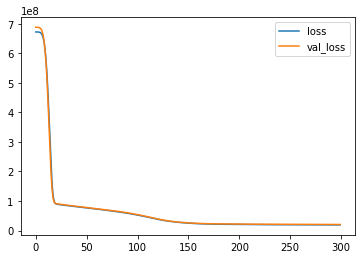

In [39]:
kayipVerisi.plot()

In [40]:
tahminDizisi = model.predict(x_test)

In [41]:
tahminDizisi

array([[22116.102],
       [23915.78 ],
       [24936.94 ],
       ...,
       [26346.557],
       [12420.825],
       [24820.906]], dtype=float32)

In [42]:
y_test

array([20995, 19791, 27791, ..., 20999, 15000, 26799], dtype=int64)

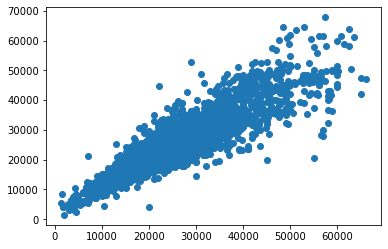

In [43]:
plt.scatter(y_test,tahminDizisi)

In [70]:
#TAHMİN
yeniAraba = dataFrame.drop("price",axis=1).iloc[2]

In [71]:
yeniAraba

year          2020.0
mileage       3999.0
tax            145.0
mpg             28.0
engineSize       4.0
Name: 3191, dtype: float64

In [72]:
yeniAraba = scaler.transform(yeniAraba.values.reshape(-1,5))

In [73]:
model.predict(yeniAraba)

array([[62223.684]], dtype=float32)

In [77]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tahminDizisi)
#Tahmin değeri 3221 oynayabilir. Kabul edilebilir olup olmaması problemden probleme değişebilir. 

3221.7922292801854